In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
#set parameters
make = 'audi'
model = 'a3'
postcode = 'w1h1pg'
radius = '10'
price_to = '10000'
page = 1

#establish number of pages in result set
url = ('http://www.autotrader.co.uk/search/used/cars/%s/%s/postcode/%s/radius/%s/price-to/%s/onesearchad/used/sort/default/page/%s/searchcontext/default')%(make, model, postcode, radius, price_to, page)
x = requests.get(url)
soup = BeautifulSoup(x.text, 'html.parser')

pages = []
for i in soup.find('li', class_ = "paginationMini__count").find_all('strong'):
    pages.append(int(i.string))

In [42]:
#initiate master dataframe
master = []

for q in range(pages[0], pages[1] + 1):
    
    page = q
    url = ('http://www.autotrader.co.uk/search/used/cars/%s/%s/postcode/%s/radius/%s/price-to/%s/onesearchad/used/sort/default/page/%s/searchcontext/default')%(make, model, postcode, radius, price_to, page)
    x = requests.get(url)
    soup = BeautifulSoup(x.text, 'html.parser')
    
    for k in range(0, len(soup.find_all('article', class_ = 'search-result '))):
        ad = soup.find_all('article', class_ = 'search-result ')[k]

        #create list of ad attributes
        attributes = []
        attributes.append(ad.find('h1', class_ = "search-result__title").text)

        #add price to list
        attributes.append(ad.find_all('div', class_= "search-result__price")[0].string)

        #add additional attributes
        for i in ad.find_all('ul', class_="search-result__attributes")[0].find_all('li')[-7:]:
            attributes.append(i.string)

        #add seller details to list
        for i in ad.find_all('p', class_= "search-result__seller-details")[0].find_all('strong'):
            attributes.append(i.string)

        master.append(attributes)
    print 'page ' + str(q)

page 1
page 2
page 3
page 4
page 5
page 6
page 7
page 8
page 9
page 10
page 11
page 12
page 13
page 14
page 15
page 16
page 17
page 18
page 19
page 20
page 21
page 22


In [43]:
df = pd.DataFrame(master)
df.columns = ['model', 'price', 'year', 'type', 'mileage', 'transmission', 'engine_size', 'hp', 'fuel', 'seller_type', 'distance']
df = df.dropna()

In [44]:
df.mileage = pd.to_numeric(df.mileage.str.replace(',| miles', ''))

In [45]:
df.price = pd.to_numeric(df.price.str.replace('\\xa3|,', ''))

In [46]:
df.year = pd.to_numeric(df.year.str.replace(' \(.*\)', ''))

In [47]:
df.engine_size = pd.to_numeric(df.engine_size.str.replace('L', ''))

In [48]:
df.hp = pd.to_numeric(df.hp.str.replace(' bhp', ''))

In [49]:
df.distance = pd.to_numeric(df.distance.str.replace(' miles| mile', ''))

In [54]:
df

,model,price,year,type,mileage,transmission,engine_size,hp,fuel,seller_type,distance
0,Audi A3 1.8 T Sport 5dr,599,2001,Hatchback,147000,Manual,1.8,150,Petrol,Trade seller,9
1,Audi A3 1.6 3dr,599,2000,Hatchback,157350,Manual,1.6,101,Petrol,Trade seller,9
2,Audi A3 1.8 Sport 3dr,600,1997,Hatchback,49600,Manual,1.8,125,Petrol,Private seller,8
3,Audi A3 1.6 SE 5dr,695,2001,Hatchback,130000,Manual,1.6,101,Petrol,Trade seller,6
4,Audi A3 1.8 SE 3dr,700,1999,Hatchback,112000,Manual,1.8,125,Petrol,Trade seller,7
5,Audi A3 1.6 5dr,790,2002,Hatchback,109000,Manual,1.6,101,Petrol,Trade seller,9
6,Audi A3 1.9 TDI SE 3dr,795,2002,Hatchback,210000,Manual,1.9,100,Diesel,Trade seller,6
7,Audi A3 1.8 SE 5dr,860,2001,Hatchback,93000,Manual,1.8,125,Petrol,Private seller,6
8,Audi A3 1.8 Sport 5dr,895,2001,Hatchback,145742,Manual,1.8,125,Petrol,Trade seller,10
9,Audi A3 1.8 SE 3dr,900,2000,Hatchback,120000,Automatic,1.8,125,Petrol,Private seller,9


In [52]:
pylab inline

/home/jb/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [53]:
import seaborn as sns
sns.set(style="ticks")

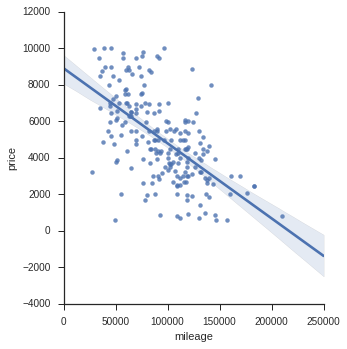

In [57]:
sns.lmplot('mileage', 'price', data=df)